# Logistic Regression Classifier 

In this notebook, we will implement Logistic Regression Classifier from scratch.For theoritical aspects please consider:

1.   https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression).
2.   https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17


**Importing Libraries**

In [1]:
# We are importing all necessary libraries to implement our model
import matplotlib.pyplot as plt
# this line tells the notebook to show plots "inline"
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**Logistic Regression Classifier Implementation**

In [2]:
class LogisticRegression:
    
    def __init__(self,alpha=0.01,iterations=1000): # constructor function to intialize learning rate alpha and number of iterations
        self.alpha = alpha
        self.iterations = iterations
    
    def sigmoid(self, z): # utility function to find sigmoid values of input
        # Reference : https://stackoverflow.com/questions/47966728/how-to-fix-float-object-has-no-attribute-exp?noredirect=1&lq=1
        z = np.array(z,dtype=float)
        return 1 / (1 + np.exp(-z))
    
    def transformMultiClass(self,y,c): # utility function to convert given mutilclass vector to 2 class 0/1 vector
        # Reference : https://stackoverflow.com/questions/56594598/change-1s-to-0-and-0s-to-1-in-numpy-array-without-looping/56594688
        y_copy = y.copy()
        indices_C = y==c            # all indices with class 'c'
        indices_notC = y!=c         # all indices with classes other than 'c'
        y_copy[indices_C]=1         # convert values to 1 for all class 'c'
        y_copy[indices_notC]=0      # convert values to 0 for all class other than 'c'
        return y_copy
    
    def gradientDescent(self,X,y,weight,h): # function to calculate gradient descent for logistic regression
        # By calculus the derivative of cost function wrt weights comes out to be xi*(y_pred - y)
        """
        # Reference : https://datascience.stackexchange.com/questions/22470/python-implementation-of-cost-function-in-logistic-regression-why-dot-multiplic
        Cost function for Logistic Regression  = -1/m * np.sum(np.dot(Y,np.log(A)) + np.dot(1-Y, np.log(1-A)))
        dw = 1/m * np.dot(X, dz.T)
        """
        costGradient = np.dot(X.T, (h - y)) / len(y) # gradient of cost function for logistic regression (calculated using chain rule of calculus)
        weight = weight - self.alpha * costGradient  # gradient descent process (updating weight on basis of cost gradients)
        return weight
    
    def costFunction(self,y,weight,h): # defines cost function for logic regression
        costValue = (1 / len(y)) * (np.sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))) # Binary cross entropy loss function
        return costValue
    
    def fit(self,X,y): # starts the logistic regression model by fitting our given dataset
        self.costs = []
        self.weights = []
        X = np.insert(X, 0, 1, axis=1) # adding 1 for bias term
        classes = set(y)               # storing unique classes (our predicted output will be one of them)
        # Using concept of one-vs-all where a particular class is treated as 1 and all other 0 and this process is repeated for all classes
        for c in classes:
            # Gradient descent for class 'c' 
            y_onevall = self.transformMultiClass(y,c)
            weight = np.zeros(X.shape[1]) # initializing weights with 0 at beginning of logistic regression
            cost = list()
            for itr in range(self.iterations):
                z = X.dot(weight)
                h = self.sigmoid(z)
                weight = self.gradientDescent(X,y_onevall,weight,h)
                cst = self.costFunction(y_onevall,weight,h)
                cost.append(cst)
            self.weights.append((weight,c))
            self.costs.append((cost,c))
        return self

    def predict(self,X): # predict class values for given independent features  
        X = np.insert(X, 0, 1, axis=1)
        X_prediction = list() # storing predicted classes
        for x in X:
            class_predictions = [(self.sigmoid(x.dot(weight)),c) for weight,c in self.weights] # This loop runs n times for n classes (multi class logistic regression one vs all)
            X_prediction.append(max(class_predictions)[1])                                     # append the class with maximum prediction value (probablity)
        return X_prediction

    def score(self,X,y): # function to calculate numner of matches between actual classes and predicted classes by our model
        size = len(y)        
        return sum(self.predict(X)==y)/size # number of matches divided by total inputs

    def plotCost(self,costs): # utility function to plot cost value per class
         for cost,c in costs   :
                plt.plot(range(len(cost)),cost,'blue')
                plt.title(" Cost Function for type " + str(c) +" vs All")
                plt.xlabel("Iterations")
                plt.ylabel("Cost")
                plt.show()


**Importing dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing dataset using pandas   
filename = 'drive/My Drive/datasets/beer.txt'
header_list = ['caloric_value','nitrogen','turbidity','style','alcohol','sugars','biterness','beer_id','colour','degree_of_fermentation']
data = pd.read_csv(filename,sep='\t', header=None,dtype=str,names=header_list)
data.dtypes

caloric_value             object
nitrogen                  object
turbidity                 object
style                     object
alcohol                   object
sugars                    object
biterness                 object
beer_id                   object
colour                    object
degree_of_fermentation    object
dtype: object

In [5]:
# creating dependent and independent features
y = data['style'].values
X = data.drop(['style','beer_id'],axis=1).values

In [6]:
# data stardaization pre-processing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Model Generation/Testing

In [7]:
scores=list()
print("Logistic Regression Classifier Learning")
for i in range(10):
    X_train,X_test,y_train,y_test  = train_test_split(X, y, train_size = 2/3, shuffle = True)
    model = LogisticRegression(alpha=0.01,iterations=1000)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = model.score(X_test,y_test)
    print("Accuracy ",i," = ",score)
    scores.append(score)

Logistic Regression Classifier Learning
Accuracy  0  =  0.9615384615384616
Accuracy  1  =  0.9615384615384616
Accuracy  2  =  0.9807692307692307
Accuracy  3  =  0.9807692307692307
Accuracy  4  =  0.9615384615384616
Accuracy  5  =  0.9615384615384616
Accuracy  6  =  0.9230769230769231
Accuracy  7  =  0.9423076923076923
Accuracy  8  =  0.9615384615384616
Accuracy  9  =  0.9615384615384616


In [8]:
print("Mean accuracy for Logistic Regression Classifier = ",np.mean(scores))

Mean accuracy for Logistic Regression Classifier =  0.9596153846153846


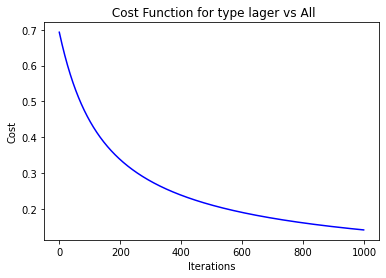

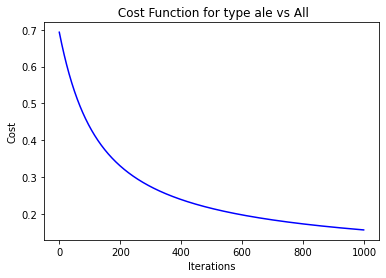

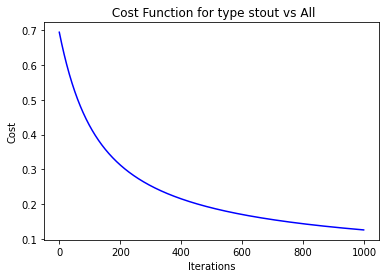

In [9]:
model.plotCost(model.costs)